<a href="https://www.kaggle.com/code/ricktenbult/airline-satisfaction-prediction?scriptVersionId=134126604" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Context  
Improving passenger satisfaction is crucial for various reasons. Firstly, satisfied passengers are more likely to become loyal customers and recommend the services to others, leading to increased customer retention and positive word-of-mouth marketing. Secondly, analyzing passenger satisfaction data allows organizations to identify pain points and areas for improvement, enabling them to make data-driven decisions and enhance the overall passenger experience. By leveraging data to understand and address passenger needs, companies can strive for continuous improvement and maintain a competitive edge in the industry.

The train dataset contains 103,904 instances and 25 attributes, of which 20 are quantitative input variables, 4 are qualitative input variables, and 1 qualitative output variable. The test dataset contains 25,976 instances and the same number of attributes as the train dataset. Furthermore, the dataset contains a total of 393 missing values and is in raw form.  

### Content 
The feature set includes: 
* ID: The unique ID number. 
* Gender: Gender of the passengers - Female, Male. 
* Customer Type: The customer type - Loyal customer, disloyal customer. 
* Age: The age of the passengers. 
* Type of Travel: Purpose of the flight of the passengers - Personal Travel, Business Travel. 
* Class: Travel class in the plane of the passengers - Business, Eco, Eco Plus. 
* Flight distance: The flight distance of this journey. 
* Inflight wifi service: Satisfaction level of the inflight wifi service - 0: Not Applicable; 1-5. 
* Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient. 
* Ease of Online booking: Satisfaction level of online booking. 
* Gate location: Satisfaction level of Gate location. 
* Food and drink: Satisfaction level of Food and drink. 
* Online boarding: Satisfaction level of online boarding. 
* Seat comfort: Satisfaction level of Seat comfort. 
* Inflight entertainment: Satisfaction level of inflight entertainment. 
* On-board service: Satisfaction level of On-board service. 
* Leg room service: Satisfaction level of Leg room service. 
* Baggage handling: Satisfaction level of baggage handling. 
* Check-in service: Satisfaction level of Check-in service. 
* Inflight service: Satisfaction level of inflight service. 
* Cleanliness: Satisfaction level of Cleanliness. 
* Departure Delay in Minutes: Minutes delayed when departure. 
* Arrival Delay in Minutes: Minutes delayed when Arrival. 
* Satisfaction: Airline satisfaction level - Satisfaction, neutral, or dissatisfaction.

In [1]:
# Import data processing and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Import feature engineering libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Import performance metrics libraries
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

# Import classifcation libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [2]:
# Load the datasets
train_data = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/train.csv")
test_data = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/test.csv")

# Create a copy of the datasets
train_df = train_data.copy()
test_df = test_data.copy()

# Define the target variable
TARGET = "satisfaction"

In [3]:
# Print the shape of the datasets
print(f"The train dataset has {train_df.shape[0]} rows and {train_df.shape[1]} columns.")
print(f"The test dataset has {test_df.shape[0]} rows and {test_df.shape[1]} columns.")

The train dataset has 103904 rows and 25 columns.
The test dataset has 25976 rows and 25 columns.


In [4]:
# Show the first 5 rows of the training dataset
train_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
# Return general information about the data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [6]:
# Return the number of missing values for each column
train_df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [7]:
# Return the number of missing values for each column
test_df.isna().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [8]:
# Return descriptive statistics of the dataset
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


In [9]:
# Drop the "Unnamed: 0" and "id" columns from the dataset, given that both columns are irrelevant
train_df.drop(columns=["Unnamed: 0", "id"], axis=1, inplace=True)
test_df.drop(columns=["Unnamed: 0", "id"], axis=1, inplace=True)

In [10]:
def select_columns(df: pd.DataFrame, threshold: int = 10) -> list[str]:
    """
    Function used to divide the columns of a DataFrame in discrete and continuous based on the specified threshold.

    Args:
        df (pd.DataFrame): A DataFrame containing the columns to be selected.
        threshold (int): A threshold defining the minimum number of unique values. Default is 10.

    Returns:
        discrete_columns (list[str]): A list of discrete column names.
        continuous_columns (list[str]): A list of continuous column names.
    """
    
    # Initialize the discrete columns list
    discrete_columns = []

    for column in df.columns:
        # Select the columns with number of unique values less than or equal to the threshold
        if df[column].nunique() <= threshold:
            # Append the selected columns to the list of discrete columns
            discrete_columns.append(column)
    
    # Select the continuous columns
    continuous_columns = [col for col in df.columns.tolist() if col not in discrete_columns]


    return discrete_columns, continuous_columns

In [11]:
# Apply the select_columns function
discrete_columns, continuous_columns = select_columns(train_df)

In [12]:
# Return the discrete and continuous columns
discrete_columns, continuous_columns

(['Gender',
  'Customer Type',
  'Type of Travel',
  'Class',
  'Inflight wifi service',
  'Departure/Arrival time convenient',
  'Ease of Online booking',
  'Gate location',
  'Food and drink',
  'Online boarding',
  'Seat comfort',
  'Inflight entertainment',
  'On-board service',
  'Leg room service',
  'Baggage handling',
  'Checkin service',
  'Inflight service',
  'Cleanliness',
  'satisfaction'],
 ['Age',
  'Flight Distance',
  'Departure Delay in Minutes',
  'Arrival Delay in Minutes'])

In [13]:
def visualizations_discrete(df: pd.DataFrame):
    """
    Function used to plot countplots for each discrete column.

    Parameters:
        - df (pd.DataFrame): A DataFrame containing the data.
    """

    # Set the figure size and layout
    fig, axes = plt.subplots(nrows=len(discrete_columns), ncols=2, figsize=(12, 6 * len(discrete_columns)))
    fig.subplots_adjust(hspace=0.25)
    sns.color_palette("Blues", as_cmap=True)
    
    for index, column in enumerate(discrete_columns):
        # Plot countplot
        sns.countplot(data=df, x=column, ax=axes[index, 0], palette="blend:#7AB,#EDA")
        axes[index, 0].set_title(f"Countplot of {column}")
        axes[index, 0].set_xlabel("")

        # Plot countplot
        sns.countplot(data=df, x=column, hue=TARGET, ax=axes[index, 1], palette="blend:#7AB,#EDA")
        axes[index, 1].set_title(f"Countplot of {column} specified by {TARGET}")
        axes[index, 1].set_xlabel("")  

    # Show the plot
    plt.show()

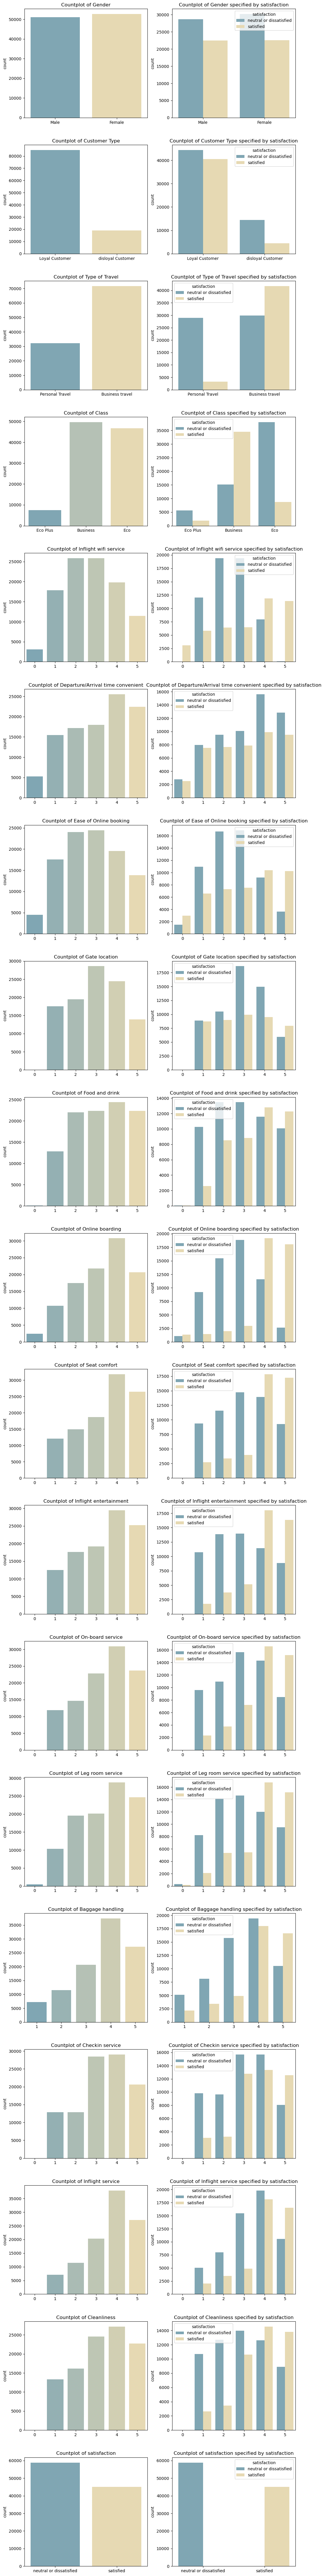

In [14]:
# Apply the visualizations_discrete function
visualizations_discrete(train_df)

Based on the figures above, the following conclusions can be drawn:
* Gender is not an important predictor for satisfaction.
* The proportion of loyal customers is extremely high. However, a large percentage of loyal customers is neutral or dissatisfied.
* Business travel has a significantly higher percentage of satisfied customers compared to personal travel. The same applies to the type of class, where business class has a higher percentage of satisfied customers compared to eco and eco plus.
* For all other predictors, the increase in service results in a higher percentage of satisfied customers.

In [15]:
def visualizations_continuous(df: pd.DataFrame, target: str):
    """
    Function used to plot the boxplot and distribution for each continuous column.

    Parameters:
        - df (pd.DataFrame): A DataFrame containing the data.
        - target (str): The target variable of a DataFrame.
    """
    
    # Set the figure size and layout
    fig, axes = plt.subplots(nrows=len(continuous_columns), ncols=2, figsize=(12, 6 * len(continuous_columns)))
    fig.tight_layout(pad=2.0)

    for index, column in enumerate(continuous_columns):
        # Plot boxplot
        sns.boxplot(data=df, x=TARGET, y=column, ax=axes[index, 0], palette="blend:#7AB,#EDA")
        axes[index, 0].set_title(f"Boxplot of {column}")
        axes[index, 0].set_xlabel("")

        # Plot distribution
        sns.histplot(data=df, x=column, kde=True, ax=axes[index, 1], palette="blend:#7AB,#EDA")
        axes[index, 1].set_title(f"Distribution of {column}")
        axes[index, 1].set_xlabel("")
        
    # Show the plot
    plt.show()

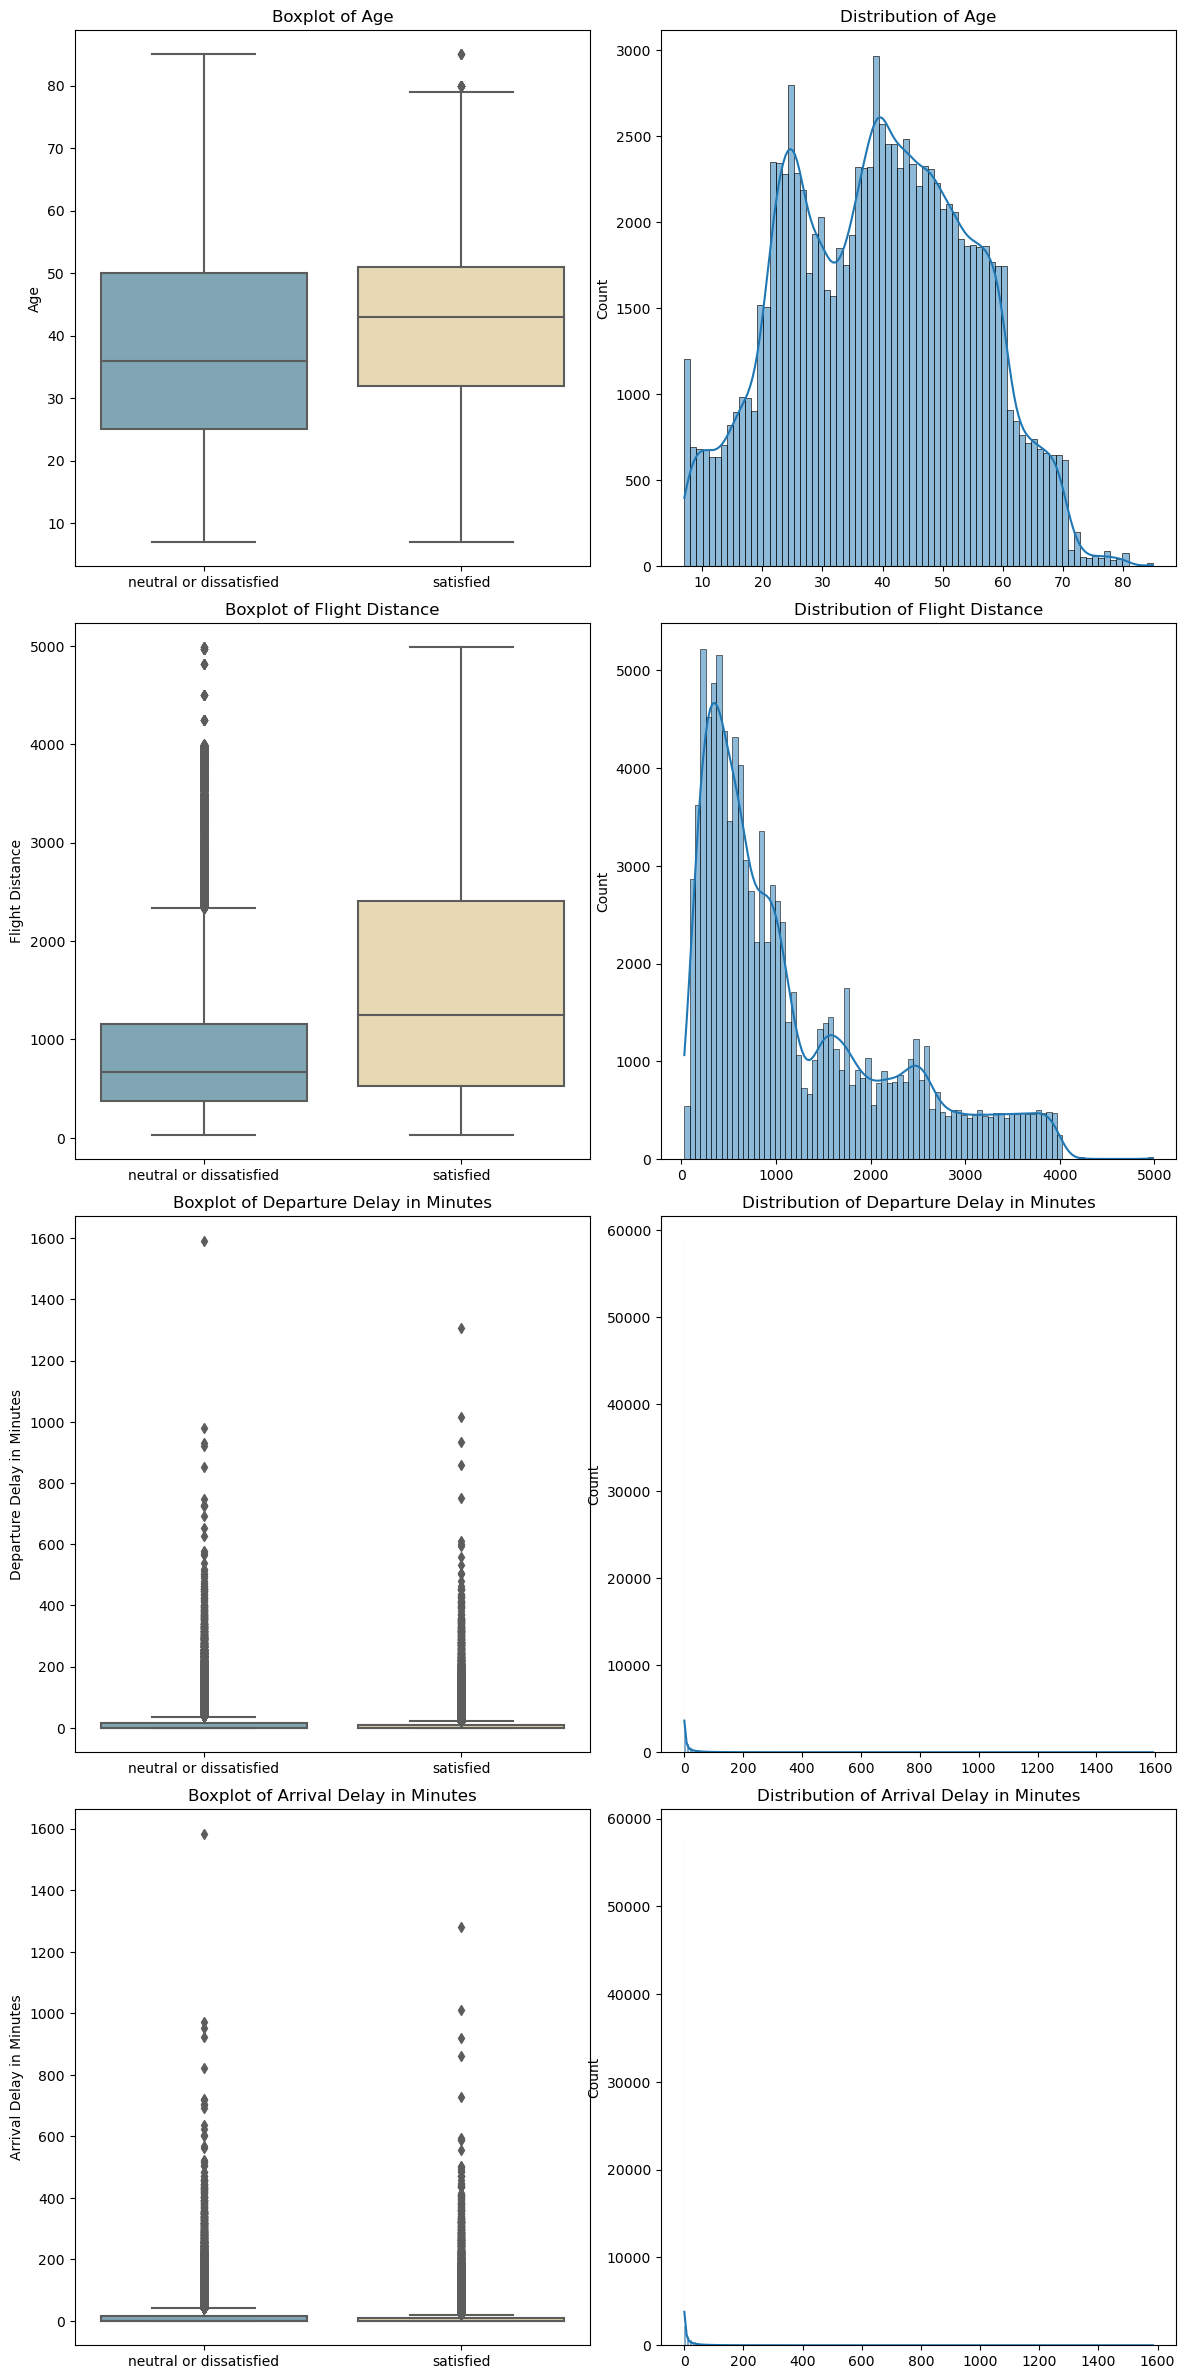

In [16]:
# Apply the visualizations_continuous function
visualizations_continuous(train_df, target=TARGET)

Based on the figures above, the following conclusions can be drawn:
* Age is not an important predictor of satisfaction. Furthermore, the number of travelers in the 30 to 40 age group seems to be decreasing.
* Flight distance seems to affect satisfaction. The boxplot suggests that passengers who traveled longer distances are generally more satisfied compared to those who traveled shorter distances.

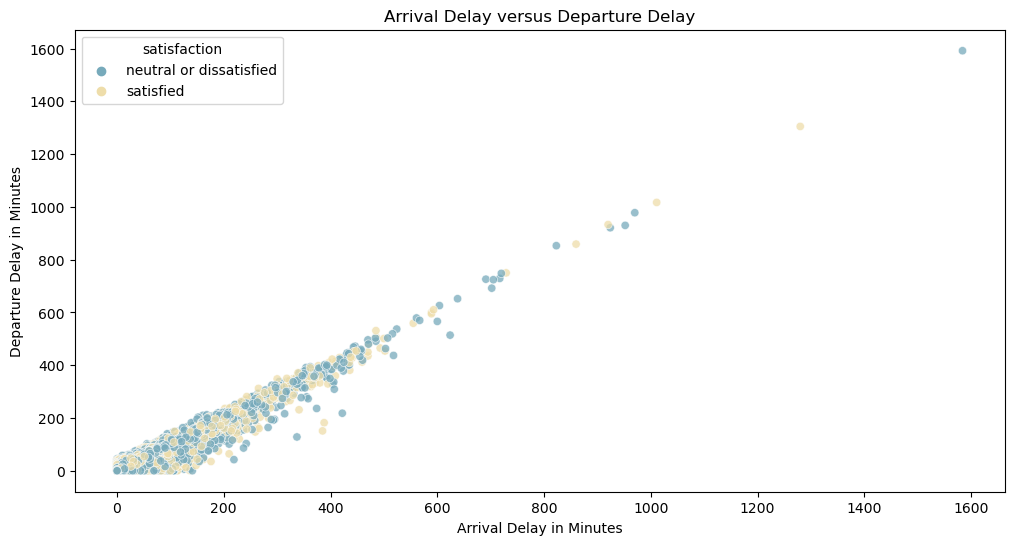

In [17]:
# Set the figure size and layout
plt.figure(figsize=(12,6), dpi=100)
plt.tight_layout(pad=2.0)

# Plot the relationship between arrival and departure delay
sns.scatterplot(data=train_df, x="Arrival Delay in Minutes", y="Departure Delay in Minutes", hue="satisfaction", palette="blend:#7AB,#EDA", alpha=0.75)
plt.title("Arrival Delay versus Departure Delay")

# Show the plot
plt.show()

Based on the figure above, the relationship between arrival and departure delay appears to be linear. After 800 minutes of delay, 4 out of 9 passengers are still satisfied.

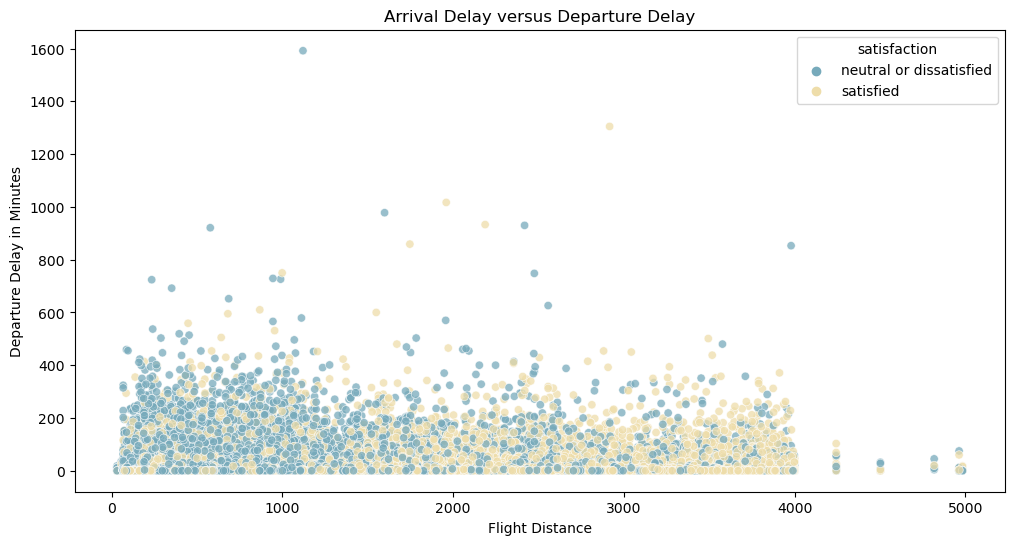

In [18]:
# Set the figure size and layout
plt.figure(figsize=(12,6), dpi=100)
plt.tight_layout(pad=2.0)

# Plot the relationship between arrival and departure delay
sns.scatterplot(data=train_df, x="Flight Distance", y="Departure Delay in Minutes", hue="satisfaction", palette="blend:#7AB,#EDA", alpha=0.75)
plt.title("Arrival Delay versus Departure Delay")

# Show the plot
plt.show()

Based on the above figure, it can be concluded that the majority of passengers accept a slight departure delay. This means that departure delay has less of a negative effect on satisfaction for long distance flights compared to short distance flights.

In [19]:
def replace_outliers(df: pd.DataFrame, inner_fence_multiplier: float = 1.5, outer_fence_multiplier: float = 3.0) -> pd.DataFrame:
    """
    Function used to replace outliers in each continuous column with the mean value.

    Parameters:
        - df (pd.DataFrame): A DataFrame containing the data.
        - inner_fence_multiplier (float): A multiplier to determine the inner fence. Default is 1.5.
        - outer_fence_multiplier (float): A multiplier to determine the outer fence. Default is 3.0.

    Returns:
        - df (pd.DataFrame): A DataFrame with outliers replaced by the mean value.
    """

    for column in continuous_columns:
        # Calculate the Interquartile Range (IQR)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate the inner and outer fences
        inner_fence_low = Q1 - inner_fence_multiplier * IQR
        inner_fence_high = Q3 + inner_fence_multiplier * IQR
        outer_fence_low = Q1 - outer_fence_multiplier * IQR
        outer_fence_high = Q3 + outer_fence_multiplier * IQR

        # Identify the outliers using the inner and outer fences
        outliers = (df[column] < inner_fence_low) | (df[column] > inner_fence_high) | \
                   (df[column] < outer_fence_low) | (df[column] > outer_fence_high)

        # Replace the outliers with the mean value
        df.loc[outliers, column] = df[column].mean()


    return df

In [20]:
# Apply the replace_outliers function to the datasets
train_df = replace_outliers(train_df)
test_df = replace_outliers(test_df)

In [21]:
def replace_missing_values(df: pd.DataFrame) -> pd.DataFrame:
    """
    Function used to replace missing values in each continuous column with the mean value.

    Parameters:
        - df (pd.DataFrame): A DataFrame containing the data.

    Returns:
        - df (pd.DataFrame): A DataFrame without missing values.
    """
    
    for column in continuous_columns:
        # Select the columns with missing values
        if df[column].isnull().any():
            # Replace the missing values with the mean value
            df[column] = df[column].fillna(df[column].mean())

    
    return df

In [22]:
# Apply the replace_missing_values function to the datasets
train_df = replace_missing_values(train_df)
test_df = replace_missing_values(test_df)

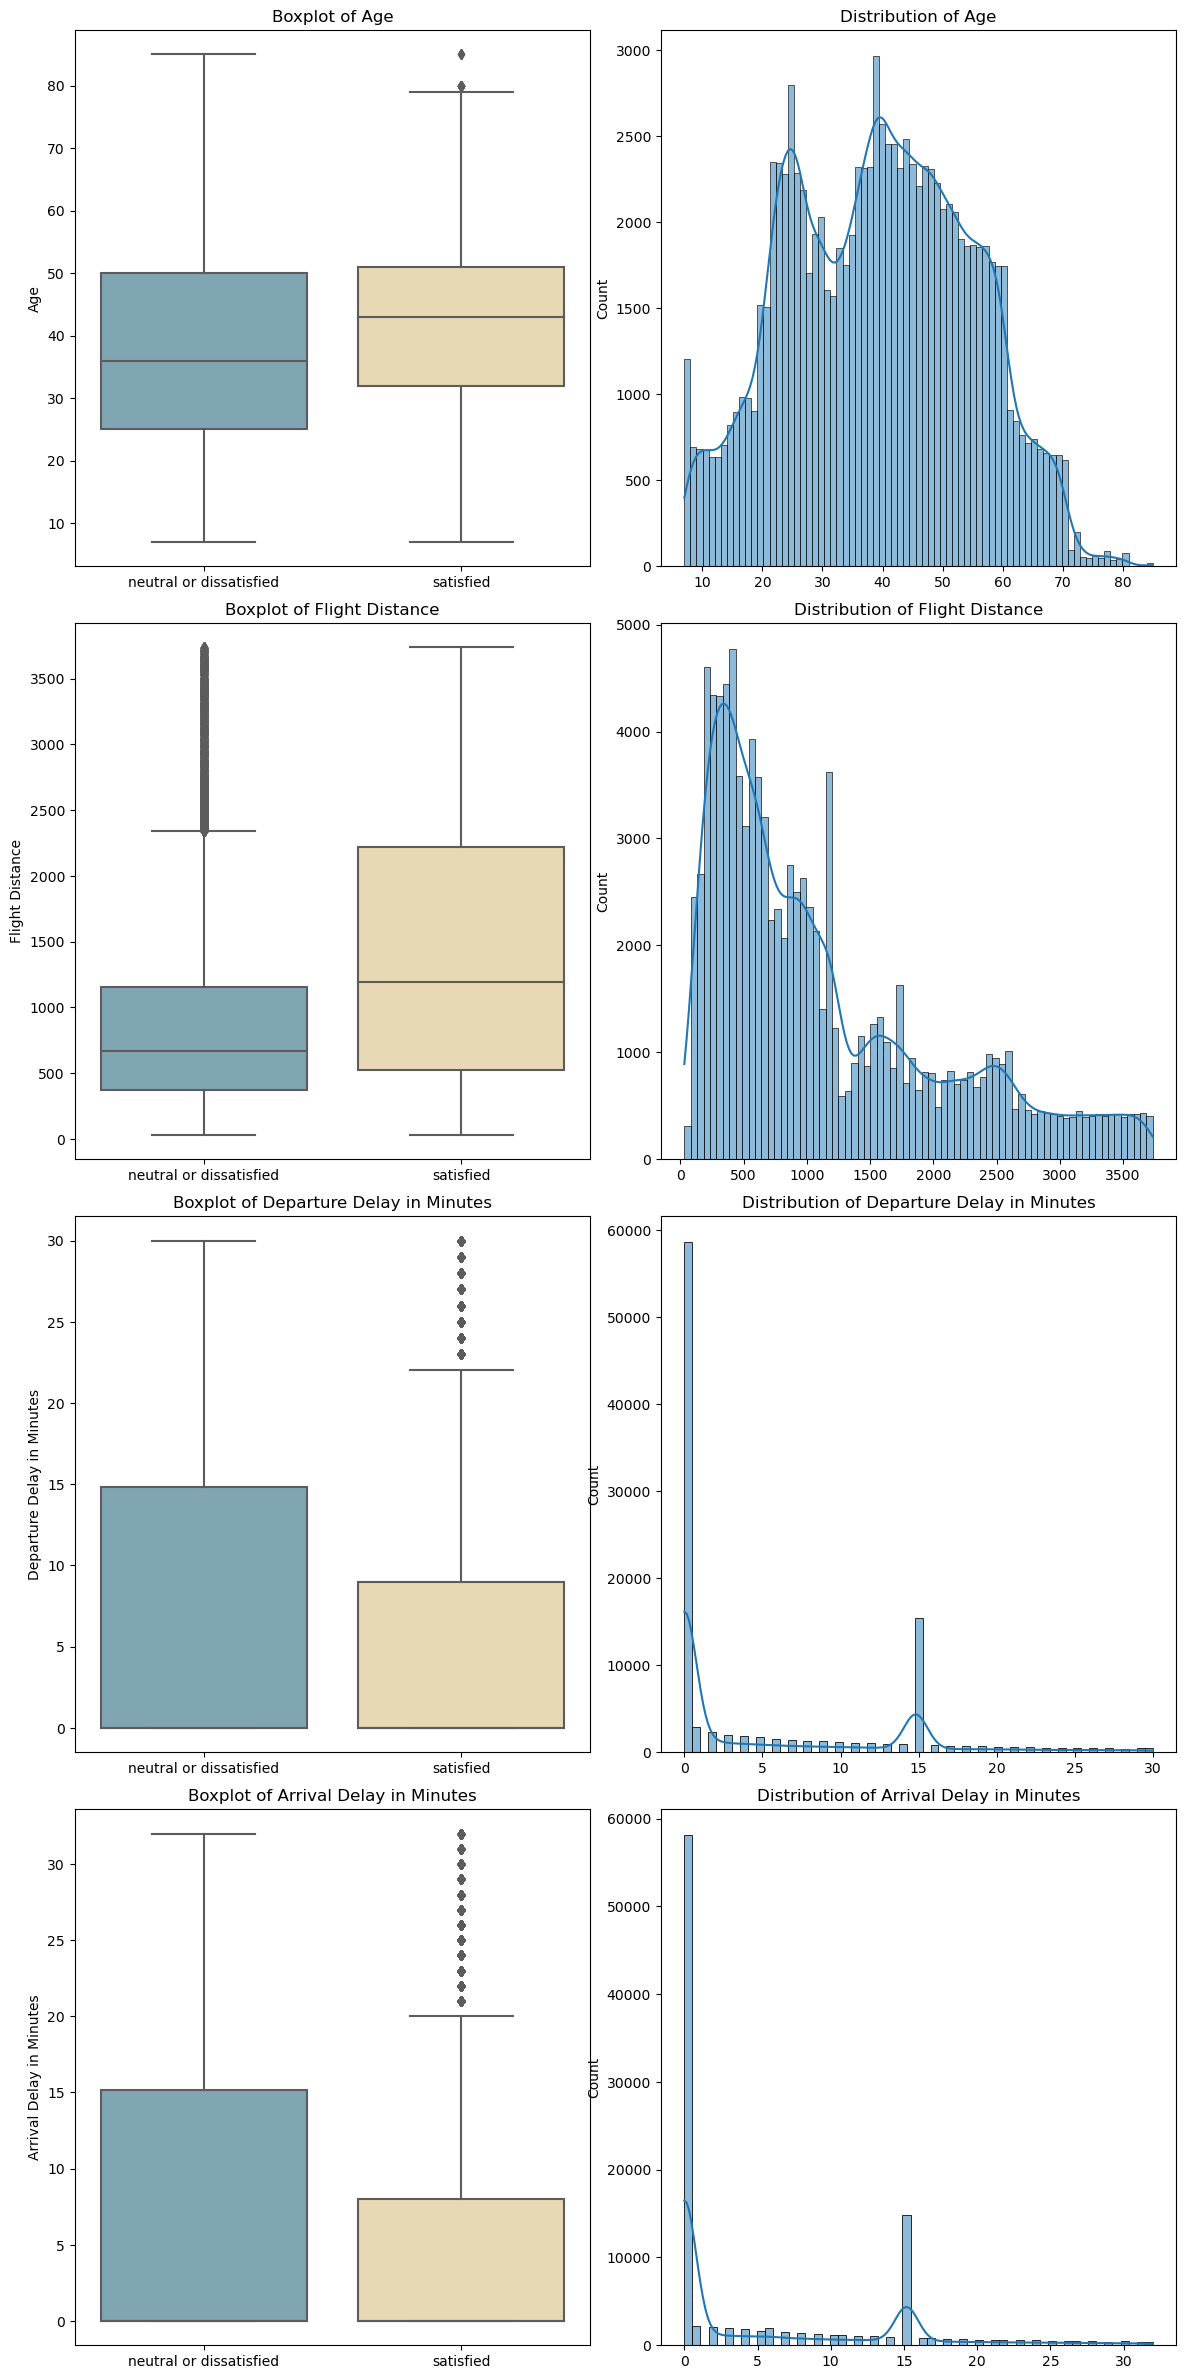

In [23]:
# Re-apply the visualizations_continuous function
visualizations_continuous(train_df, target=TARGET)

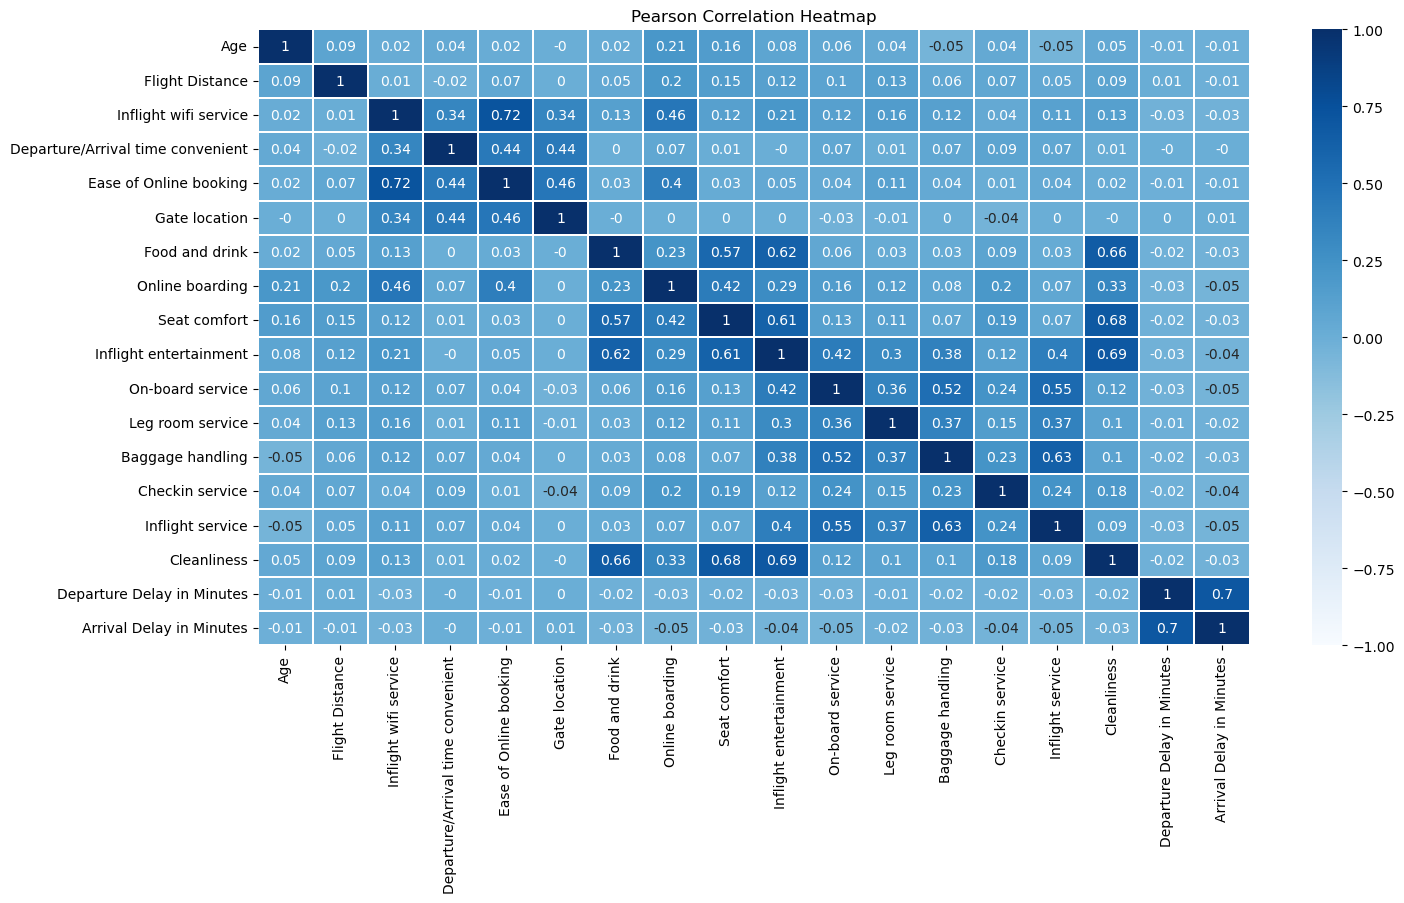

In [24]:
# Set the figure size and layout
plt.figure(figsize=(16,8))
plt.tight_layout(pad=2.0)

# Plot the correlation between the features
corr_matrix = train_df.corr().round(2)
sns.heatmap(corr_matrix, annot=True, cmap="Blues", linewidths=0.2, fmt=".2g", vmin=-1, vmax=1)
plt.title("Pearson Correlation Heatmap")

# Show the plot
plt.show()

In [25]:
# Define the label enconder and the ordinal enconder
label_encoder = LabelEncoder()
ordinal_encoder = OrdinalEncoder()

# Columns for label and ordinal encoding
label_columns = ["Type of Travel", "satisfaction"]
ordinal_columns = ["Customer Type", "Class"]

# Apply the label encoder
train_df[label_columns] = train_df[label_columns].apply(label_encoder.fit_transform)
test_df[label_columns] = test_df[label_columns].apply(label_encoder.fit_transform)

# Apply the ordinal encoder
train_df[ordinal_columns] = ordinal_encoder.fit_transform(train_df[ordinal_columns])
test_df[ordinal_columns] = ordinal_encoder.fit_transform(test_df[ordinal_columns])

Based on the visualizations, it can be concluded that age and gender have little influence on satisfaction. Therefore, both columns are removed from the dataset.

In [26]:
# Drop the "Age" and "Gender" columns from the dataset, given that both columns are irrelevant
train_df.drop(["Age", "Gender"], axis=1, inplace=True)
test_df.drop(["Age", "Gender"], axis=1, inplace=True)

In [27]:
# Split the dataset into X_train, X_test, y_train, and y_test
X_train = train_df.drop(columns=[TARGET], axis=1)
X_test = test_df.drop(columns=[TARGET], axis=1)
y_train = train_df[TARGET]
y_test = test_df[TARGET]

In [28]:
# Return the size of X_train and X_test
print(f"Size of training data: {X_train.shape[0]} rows and {X_train.shape[1]} columns.")
print(f"Size of testing data: {X_test.shape[0]} rows and {X_test.shape[1]} columns.")

Size of training data: 103904 rows and 20 columns.
Size of testing data: 25976 rows and 20 columns.


In [29]:
# Define the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

In [30]:
# Prespecify the random state
RANDOM_STATE = 2

In [31]:
# Define the oversampler
oversampler = RandomOverSampler(random_state=RANDOM_STATE)

# Oversample the minority class
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train_scaled, y_train)

# Define the undersampler
undersampler = RandomUnderSampler(random_state=RANDOM_STATE)

# Undersample the majority class
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train_scaled, y_train)

In [32]:
# Define the base models to be trained and evaluated
base_models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(random_state=RANDOM_STATE),
    "XGBClassifier": XGBClassifier(random_state=RANDOM_STATE),
    "BaggingClassifier": BaggingClassifier(random_state=RANDOM_STATE),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=RANDOM_STATE),
    "CatBoostClassifier": CatBoostClassifier(random_state=RANDOM_STATE, verbose=50),
}

In [33]:
def train_and_evaluate_models_with_sampling(models: dict) -> pd.DataFrame:
    """
    Function used to fit, predict, and evaluate different models using both oversampling and undersampling.

    Parameters:
        - models (dict): A dictionary of model names and model objects.

    Returns:
        - base_results (pd.DataFrame): A DataFrame containing the performance for each base model.
    """
    
    # Initialize the base results DataFrame
    base_results = pd.DataFrame(columns=["Accuracy", "Recall", "Precision", "F1"])

    for model_name, model in models.items():
    # Train the model on oversampled data
        # Fit the model
        model.fit(X_train_oversampled, y_train_oversampled)

        # Predict the target variable
        y_pred_oversampled = model.predict(X_test_scaled)

        # Calculate the evaluation metrics
        accuracy_oversampled = round(accuracy_score(y_test, y_pred_oversampled),3)
        recall_oversampled = round(recall_score(y_test, y_pred_oversampled),3)
        precision_oversampled = round(precision_score(y_test, y_pred_oversampled),3)
        f1_oversampled = round(f1_score(y_test, y_pred_oversampled),3)

        # Store the results in the DataFrame
        base_results.loc[f"{model_name} (Oversampled)"] = [accuracy_oversampled, recall_oversampled,
                                                      precision_oversampled, f1_oversampled]
        
    # Train the model on undersampled data
        # Fit the model
        model.fit(X_train_undersampled, y_train_undersampled)

        # Predict the target variable
        y_pred_undersampled = model.predict(X_test_scaled)

        # Calculate the evaluation metrics
        accuracy_undersampled = round(accuracy_score(y_test, y_pred_undersampled),3)
        recall_undersampled = round(recall_score(y_test, y_pred_undersampled),3)
        precision_undersampled = round(precision_score(y_test, y_pred_undersampled),3)
        f1_undersampled = round(f1_score(y_test, y_pred_undersampled),3)

        # Store the results in the DataFrame
        base_results.loc[f"{model_name} (Undersampled)"] = [accuracy_undersampled, recall_undersampled,
                                                       precision_undersampled, f1_undersampled]

    # Sort the base results in descending order of accuracy
    base_results.sort_values(by="Accuracy", ascending=False, inplace=True)


    return base_results

In [34]:
# Apply the train_and_evaluate_models_with_sampling function
results = train_and_evaluate_models_with_sampling(base_models)

Learning rate set to 0.078931
0:	learn: 0.5892525	total: 78.7ms	remaining: 1m 18s
50:	learn: 0.1248225	total: 1.16s	remaining: 21.6s
100:	learn: 0.1042937	total: 2.24s	remaining: 20s
150:	learn: 0.0970773	total: 3.27s	remaining: 18.4s
200:	learn: 0.0916774	total: 4.28s	remaining: 17s
250:	learn: 0.0876295	total: 5.3s	remaining: 15.8s
300:	learn: 0.0844208	total: 6.35s	remaining: 14.7s
350:	learn: 0.0818556	total: 7.36s	remaining: 13.6s
400:	learn: 0.0795777	total: 8.38s	remaining: 12.5s
450:	learn: 0.0777058	total: 9.38s	remaining: 11.4s
500:	learn: 0.0759652	total: 10.4s	remaining: 10.4s
550:	learn: 0.0742736	total: 11.5s	remaining: 9.36s
600:	learn: 0.0726961	total: 12.5s	remaining: 8.3s
650:	learn: 0.0713044	total: 13.5s	remaining: 7.25s
700:	learn: 0.0698762	total: 14.6s	remaining: 6.21s
750:	learn: 0.0685611	total: 15.6s	remaining: 5.17s
800:	learn: 0.0674870	total: 16.6s	remaining: 4.13s
850:	learn: 0.0663822	total: 17.6s	remaining: 3.09s
900:	learn: 0.0652669	total: 18.6s	remain

In [35]:
# Show the results of the trained and evaluated models
results

,Accuracy,Recall,Precision,F1
Random Forest Classifier (Oversampled),0.962,0.945,0.967,0.956
CatBoostClassifier (Oversampled),0.962,0.949,0.963,0.956
CatBoostClassifier (Undersampled),0.961,0.950,0.961,0.955
XGBClassifier (Oversampled),0.960,0.946,0.963,0.955
XGBClassifier (Undersampled),0.960,0.950,0.960,0.955
Random Forest Classifier (Undersampled),0.959,0.948,0.959,0.953
BaggingClassifier (Oversampled),0.957,0.937,0.964,0.950
BaggingClassifier (Undersampled),0.954,0.940,0.956,0.948
GradientBoostingClassifier (Oversampled),0.942,0.933,0.934,0.934
GradientBoostingClassifier (Undersampled),0.942,0.935,0.933,0.934


In [36]:
# Define the Random Forest Classifier
model = RandomForestClassifier(random_state=RANDOM_STATE)

# Fit the model to the data
model.fit(X_train_oversampled, y_train_oversampled)

# Predict the target variable
y_pred_oversampled = model.predict(X_test_scaled)

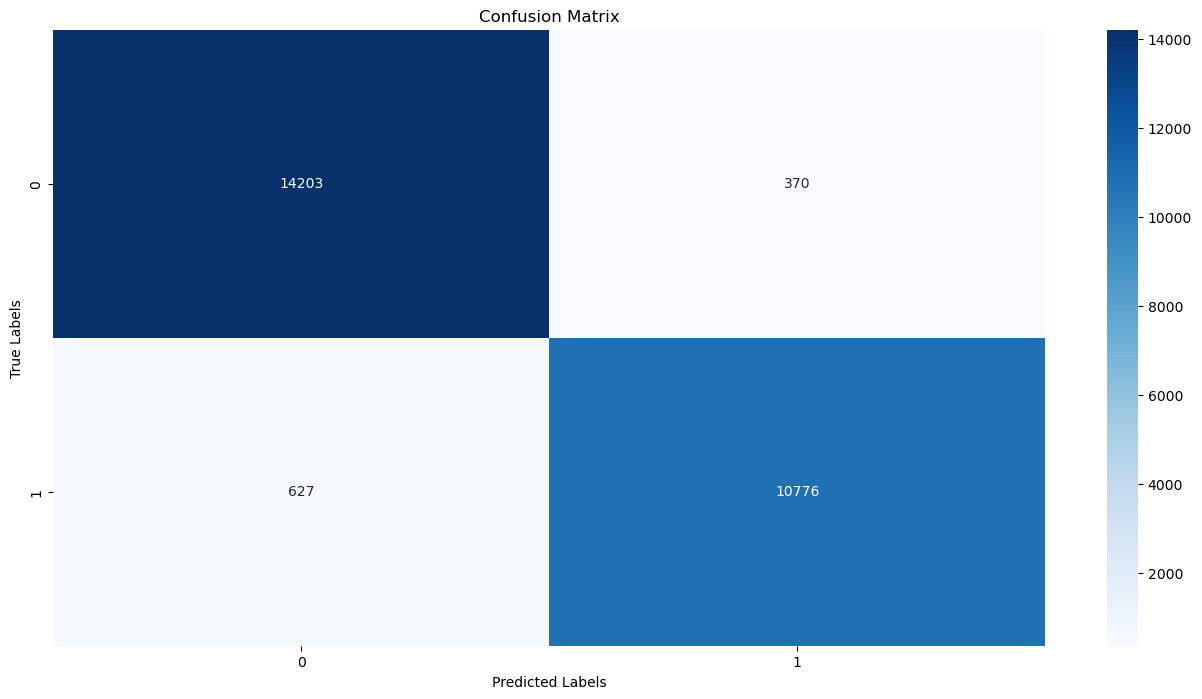

In [37]:
# Create the confusion matrix
matrix = confusion_matrix(y_test, y_pred_oversampled)

# Create a DataFrame from the confusion matrix
matrix_df = pd.DataFrame(matrix, index=np.unique(train_df[TARGET]), columns=np.unique(train_df[TARGET]))

# Set the figure size and layout
plt.figure(figsize=(16,8))
plt.tight_layout(pad=2.0)

# Create a heatmap for the confusion matrix
sns.heatmap(matrix_df, annot=True, cmap="Blues", fmt="d")

# Add labels, title, and axis ticks
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

# Show the plot
plt.show()

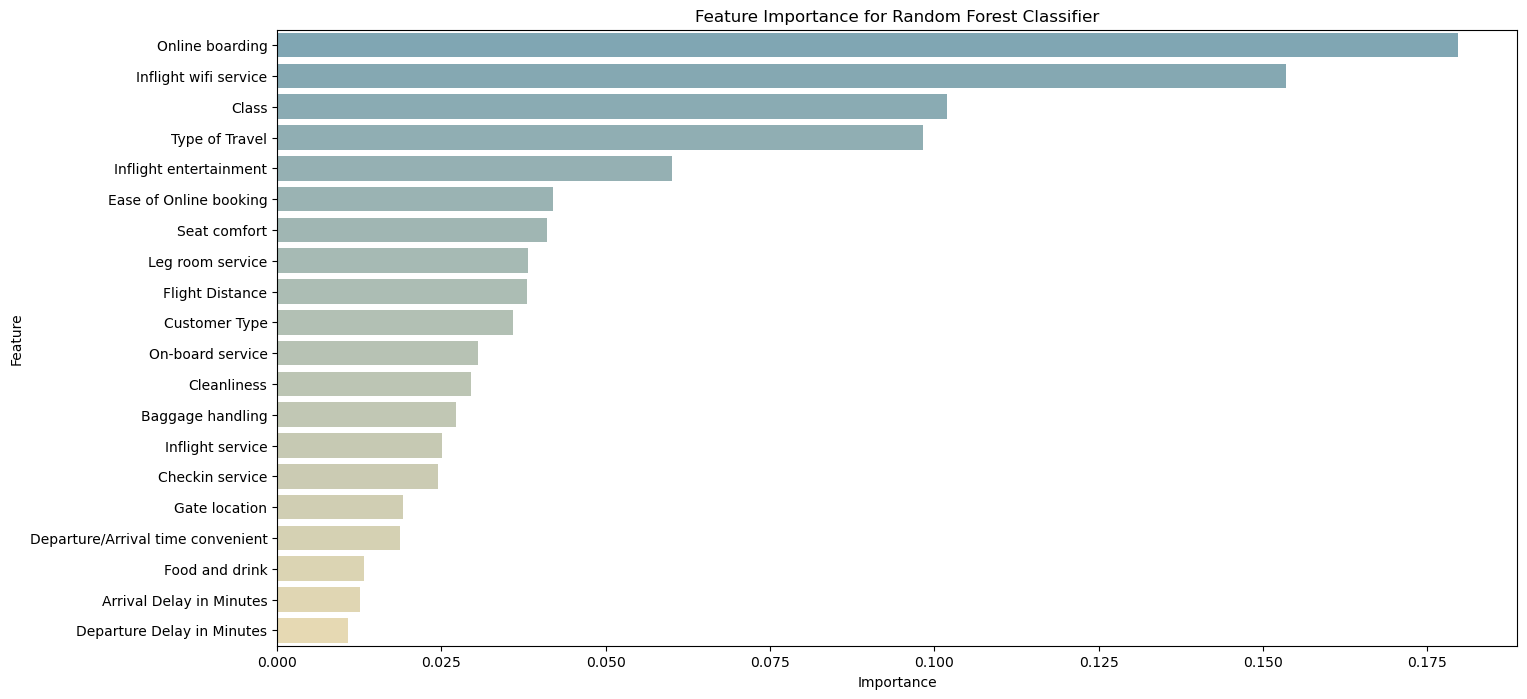

In [38]:
# Retrieve the feature importances
feature_importance = model.feature_importances_

# Initialize a DataFrame with feature names and the corresponding importance values
importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": feature_importance}).sort_values(by="Importance", ascending=False)

# Set the figure size and layout
plt.figure(figsize=(16,8))
plt.tight_layout(pad=2.0)

# Plot the feature importances
sns.barplot(data=importance_df, x="Importance", y="Feature", orient="h", palette="blend:#7AB,#EDA")

# Add labels and title
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for Random Forest Classifier")

# Show the plot
plt.show()